# About the Dataset

> This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

> **Attribute Information**
> * Age (age in years)
> * Sex (1 = male; 0 = female)
> * CP (chest pain type)
> * TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
> * CHOL (serum cholestoral in mg/dl)
> * FBS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> * RESTECH (resting electrocardiographic results)
> * THALACH (maximum heart rate achieved)
> * EXANG (exercise induced angina (1 = yes; 0 = no))
> * OLDPEAK (ST depression induced by exercise relative to rest)
> * SLOPE (the slope of the peak exercise ST segment)
> * CA (number of major vessels (0-3) colored by flourosopy)
> * THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
> * TARGET (1 or 0)

# Set ups

In [ ]:
#!pip install --pre pycaret
#!pip install mlxtend --upgrade --no-deps

In [1]:
#common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#Cross Validation
from sklearn.model_selection import RandomizedSearchCV
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#ensembling
from mlxtend.classifier import StackingCVClassifier

# Model

## Understand the data

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [8]:
df["cp"].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

Saving figure attribute_histogram_plots


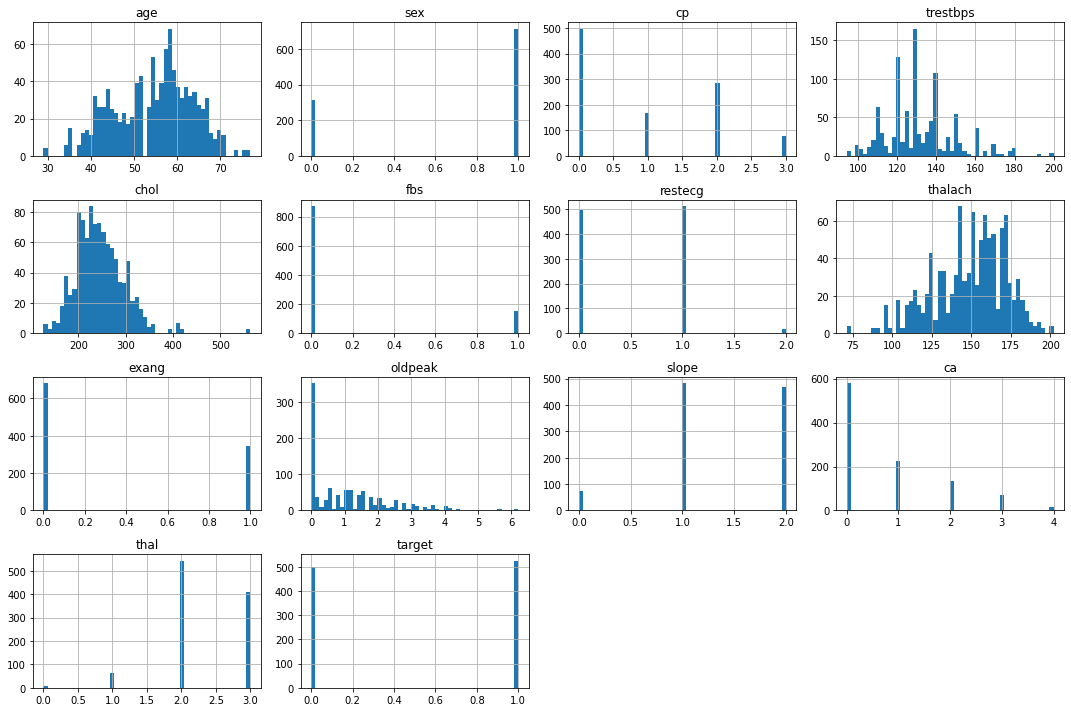

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

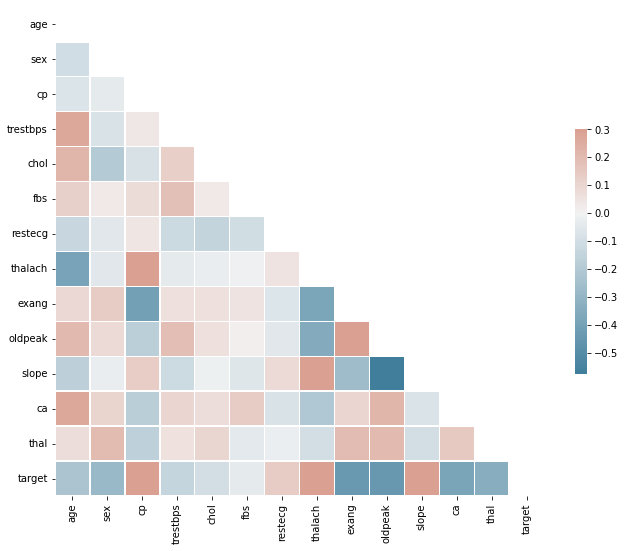

In [32]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Saving figure scatter_matrix_plot


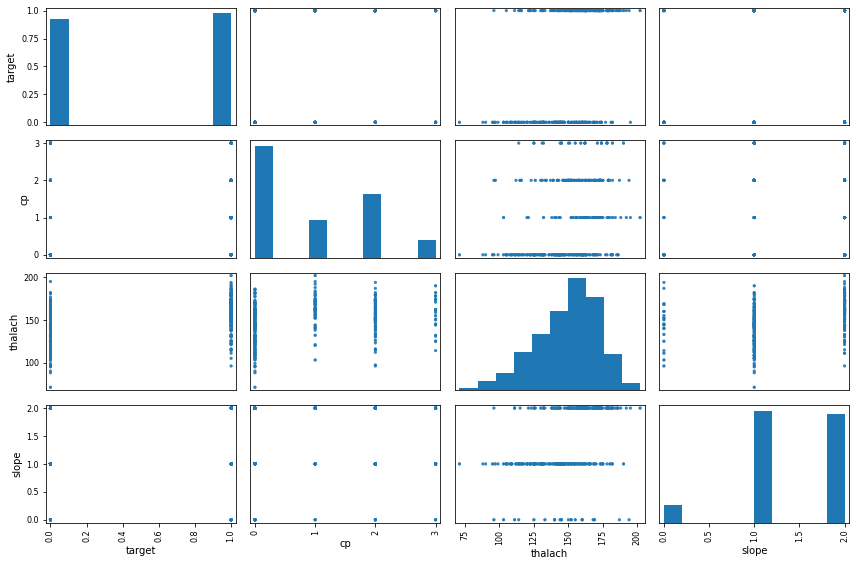

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["target", "cp", "thalach", "slope"]

scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


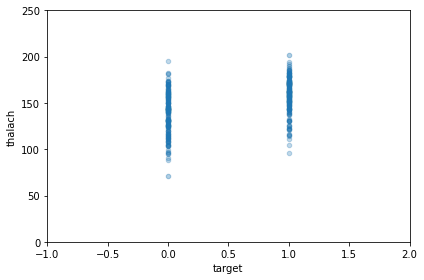

In [35]:
df.plot(kind="scatter", x="target", y="thalach",
             alpha=0.1)
plt.axis([-1, 2, 0, 250])
save_fig("income_vs_house_value_scatterplot")

## Charts

Saving figure heart_disease_frequency_for_sex


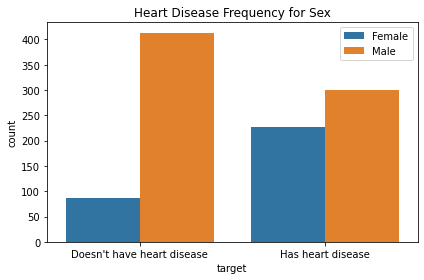

In [ ]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'])
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

save_fig("HD_frequency_for_sex")

Saving figure type_CP_for_sex


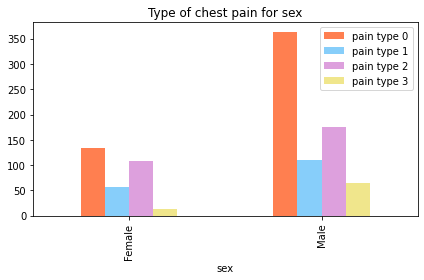

In [ ]:
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'])
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

save_fig("type_CP_for_sex")

Saving figure type_chest_pain_with_disease


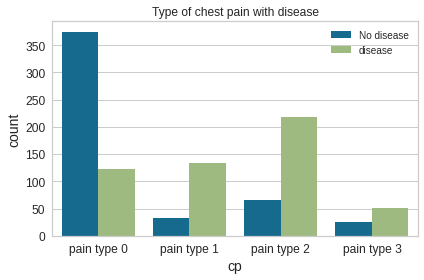

In [ ]:
fig = sns.countplot(x = 'cp', data = df, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'])
plt.legend(['No disease', 'disease']);
plt.title('Type of chest pain with disease')

save_fig("type_chest_pain_with_disease")

Saving figure HD_Age_Max_HR


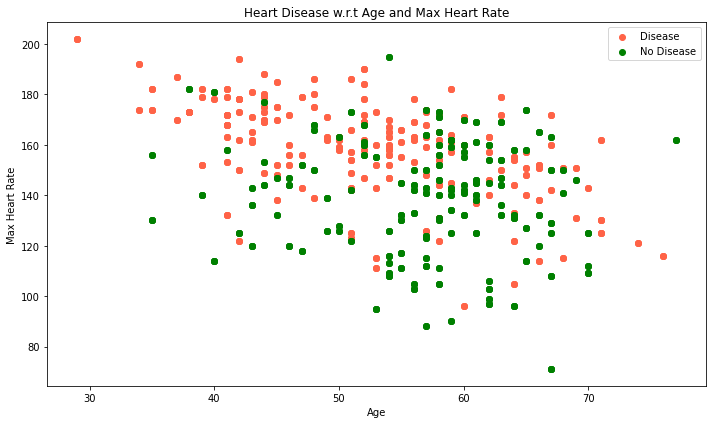

In [110]:
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="green")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

save_fig("HD_Age_Max_HR")

Saving figure HD_Age_SerumChol


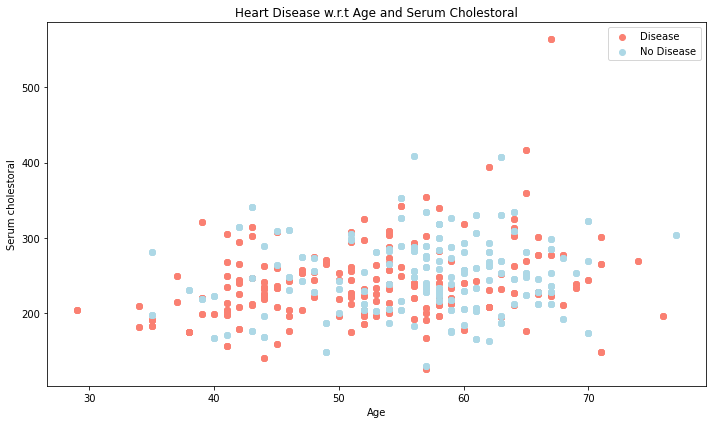

In [111]:
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

save_fig("HD_Age_SerumChol")

## Random Dataset

In [106]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [107]:
et = ExtraTreesClassifier(random_state=0)
et.fit(X_train,y_train)
et_predicted = et.predict(X_test)
et_conf_matrix = confusion_matrix(y_test, et_predicted)
et_acc_score = accuracy_score(y_test, et_predicted)
print("confussion matrix")
print(et_conf_matrix)
print("\n")
print("Accuracy of Extra Trees Classifier:",et_acc_score*100,'\n')
print(classification_report(y_test,et_predicted))

confussion matrix
[[145   0]
 [  0 163]]


Accuracy of Extra Trees Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [108]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[145   0]
 [  0 163]]


Accuracy of Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [109]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train,y_train)
gbc_predicted = gbc.predict(X_test)
gbc_conf_matrix = confusion_matrix(y_test, gbc_predicted)
gbc_acc_score = accuracy_score(y_test, gbc_predicted)
print("confussion matrix")
print(gbc_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",gbc_acc_score*100,'\n')
print(classification_report(y_test,gbc_predicted))

confussion matrix
[[140   5]
 [  2 161]]


Accuracy of Random Forest: 97.72727272727273 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.97      0.99      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



## Stratified Dataset

In [41]:
split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df["target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [46]:
strat_test_set["target"].value_counts() / len(strat_test_set)

1    0.512987
0    0.487013
Name: target, dtype: float64

In [47]:
df["target"].value_counts() / len(df)

1    0.513171
0    0.486829
Name: target, dtype: float64

In [48]:
def target_proportions(data):
    return data["target"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": target_proportions(df),
    "Stratified": target_proportions(strat_test_set),
    "Random": target_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [49]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.486829,0.487013,0.497561,2.204409,0.037738
1,0.513171,0.512987,0.502439,-2.091255,-0.035801


In [50]:
X_train = strat_train_set.drop("target", axis=1) # drop labels for training set
y_train = strat_train_set["target"].copy()
X_test = strat_test_set.drop("target", axis=1)
y_test = strat_test_set["target"].copy()

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [52]:
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.fit_transform(X_test)

In [53]:
X_train_prepared.shape

(717, 13)

In [76]:


rf = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_prepared, y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [79]:
rf = RandomForestClassifier(n_estimators=1000, max_features='auto', max_depth= 140, random_state=42)
rf.fit(X_train_prepared ,y_train)

RandomForestClassifier(max_depth=140, n_estimators=1000)

In [ ]:
from sklearn.model_selection import cross_val_score
rf_cv_score = cross_val_score(rf, X_train_prepared, y_train, cv=10, scoring='roc_auc')

In [80]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = pipeline.transform(some_data)

print("Predictions:", rf.predict(some_data_prepared))

Predictions: [0 0 1 1 0]


In [81]:
print("Labels:", list(some_labels))

Labels: [0, 0, 1, 1, 0]


In [82]:
from sklearn.metrics import accuracy_score

hd_predictions = rf.predict(X_train_prepared)
hd_acs = accuracy_score(y_train, hd_predictions)
hd_acs

1.0

In [86]:
rf_predict = rf.predict(X_test_prepared)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict))
print('\n')
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[147   3]
 [  6 152]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       150
           1       0.98      0.96      0.97       158

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



=== All AUC Scores ===
[1.         0.9953668  0.9984556  0.9984556  0.9984556  1.
 0.99305019 0.99761905 1.         1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.998140283140283


In [69]:
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train_prepared ,y_train)
et_predicted = et.predict(X_test_prepared)
et_conf_matrix = confusion_matrix(y_test, et_predicted)
et_acc_score = accuracy_score(y_test, et_predicted)
print("confussion matrix")
print(et_conf_matrix)
print("\n")
print("Accuracy of Extra Trees Classifier:",et_acc_score*100,'\n')
print(classification_report(y_test,et_predicted))

confussion matrix
[[147   3]
 [  3 155]]


Accuracy of Extra Trees Classifier: 98.05194805194806 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.98      0.98      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [93]:
gbc = GradientBoostingClassifier(random_state=42)

learning_rate = [float(x) for x in np.linspace(start = 0.1, stop = 2, num = 8)]
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

random_grid = {
 'learning_rate': learning_rate,
 'max_depth': max_depth
 }

gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, n_iter = 90, cv = 3, verbose=2, random_state=42, n_jobs = -1)
gbc_random.fit(X_train_prepared, y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [97]:
cvres = gbc_random.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9400278940027894 {'max_depth': 420, 'learning_rate': 1.7285714285714286}
0.9400278940027894 {'max_depth': 300, 'learning_rate': 1.7285714285714286}
0.9400278940027894 {'max_depth': 140, 'learning_rate': 1.7285714285714286}
0.9400278940027894 {'max_depth': 500, 'learning_rate': 2.0}
0.9344490934449095 {'max_depth': 460, 'learning_rate': 0.6428571428571428}
0.9400278940027894 {'max_depth': 380, 'learning_rate': 1.7285714285714286}
0.9400278940027894 {'max_depth': 460, 'learning_rate': 1.457142857142857}
0.9400278940027894 {'max_depth': 340, 'learning_rate': 0.9142857142857143}
0.9386331938633194 {'max_depth': 100, 'learning_rate': 0.1}
0.9386331938633194 {'max_depth': 500, 'learning_rate': 0.1}
0.9400278940027894 {'max_depth': 260, 'learning_rate': 1.457142857142857}
0.9344490934449095 {'max_depth': 340, 'learning_rate': 0.6428571428571428}
0.9456066945606695 {'max_depth': 340, 'learning_rate': 0.37142857142857144}
0.9386331938633194 {'max_depth': 260, 'learning_rate': 0.1}
0.934449093

In [71]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_prepared ,y_train)
gbc_predicted = gbc.predict(X_test_prepared)
gbc_conf_matrix = confusion_matrix(y_test, gbc_predicted)
gbc_acc_score = accuracy_score(y_test, gbc_predicted)
print("confussion matrix")
print(gbc_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",gbc_acc_score*100,'\n')
print(classification_report(y_test,gbc_predicted))

confussion matrix
[[136  14]
 [  7 151]]


Accuracy of Random Forest: 93.18181818181817 

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       150
           1       0.92      0.96      0.93       158

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



In [75]:
scv=StackingCVClassifier(classifiers=[et,rf,gbc],meta_classifier=gbc, random_state=42)
scv.fit(X_train_prepared,y_train)
scv_predicted = scv.predict(X_test_prepared)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[147   3]
 [  3 155]]


Accuracy of StackingCVClassifier: 98.05194805194806 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.98      0.98      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



## skiwness and kurtosis

https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85

Saving figure age_skewness_and_kurtosis


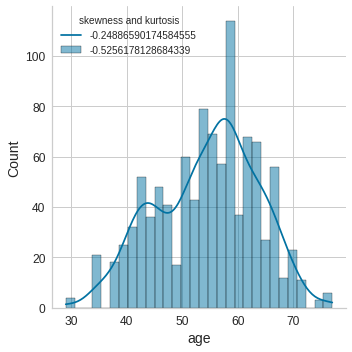

In [ ]:
sns.displot( x = 'age', data = df, bins = 30, kde = True)
skewness=str(df["age"].skew())
kurtosis=str(df["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))

save_fig("age_skewness_and_kurtosis")
plt.show();


Saving figure thalach_skewness_and_kurtosis


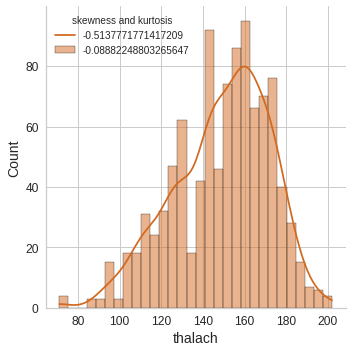

In [ ]:
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate')
skewness=str(df["thalach"].skew())
kurtosis=str(df["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))

save_fig("SK_thalach")
plt.show();

Saving figure Heart_disease_Age_Max_heart_rate


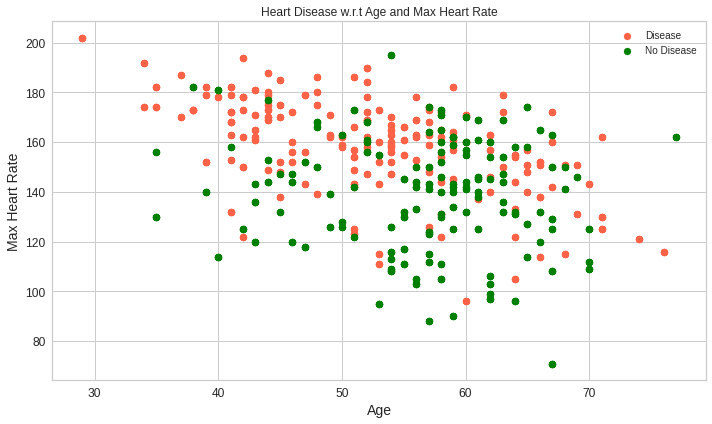

In [ ]:
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="green")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

save_fig("HD_Age_Max_HR")

Saving figure max_heart_achived_people_HD


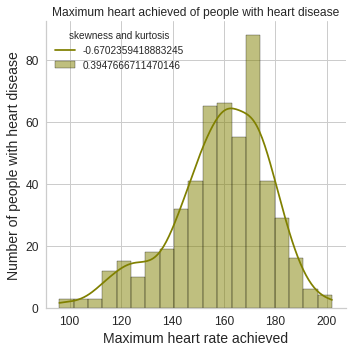

In [ ]:
sns.displot(x = df.thalach[df.target==1], data = df, kde = True, color= 'olive')
skewness=str(df.thalach[df.target==1].skew())
kurtosis=str(df.thalach[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of people with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

save_fig("max_heart_achived_people_HD")

Saving figure Max_heart_achieved_people_without_HD


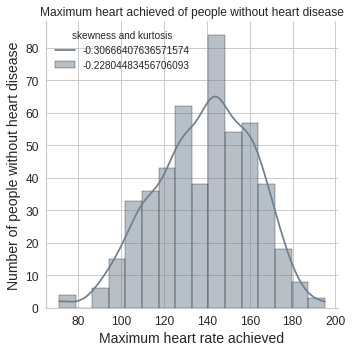

In [ ]:
sns.displot(x = df.thalach[df.target==0], data = df, kde = True, color= 'slategray')
skewness=str(df.thalach[df.target==0].skew())
kurtosis=str(df.thalach[df.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

save_fig("SK_MaxHeartAchieved_withoutHD")

Saving figure SK_chol


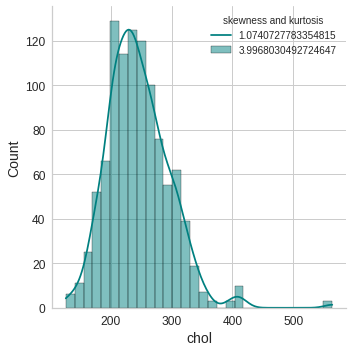

In [ ]:
sns.displot(x = 'chol', data = df, bins = 30, kde = True, color = 'teal')
skewness=str(df['chol'].skew())
kurtosis=str(df['chol'].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));

save_fig("SK_chol")

Saving figure HD_Age_SerumChol


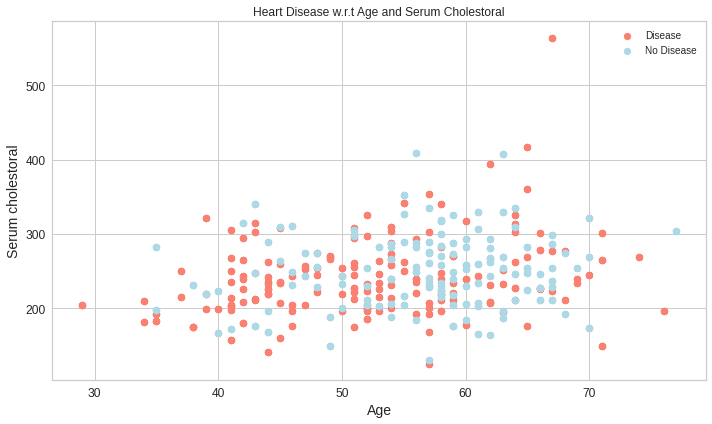

In [ ]:
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

save_fig("HD_Age_SerumChol")

Saving figure SK_SerumChol_withHD


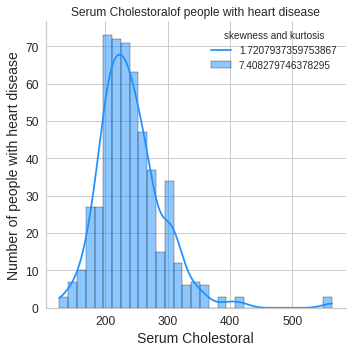

In [ ]:
sns.displot(x = df.chol[df.target==1], data = df, kde = True, color= 'dodgerblue')
skewness=str(df.chol[df.target==1].skew())
kurtosis=str(df.chol[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

save_fig("SK_SerumChol_withHD")

Saving figure SK_SerumChol_WithoutHD


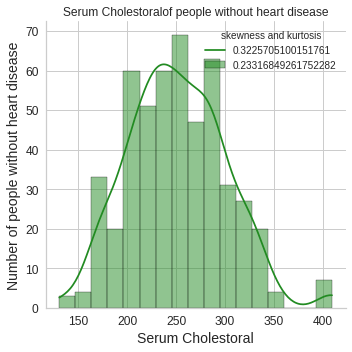

In [ ]:
sns.displot(x = df.chol[df.target==0], data = df, kde = True, color= 'forestgreen')
skewness=str(df.chol[df.target==0].skew())
kurtosis=str(df.chol[df.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

save_fig("SK_SerumChol_WithoutHD")

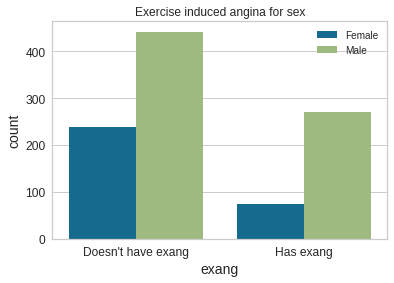

In [ ]:
fig = sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

In [ ]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

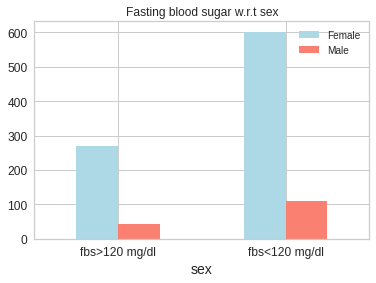

In [ ]:
fig = pd.crosstab(df.sex, df.fbs).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t sex")
fig.set_xticklabels(labels=['fbs>120 mg/dl', 'fbs<120 mg/dl'], rotation=0)
plt.legend(['Female', 'Male']);

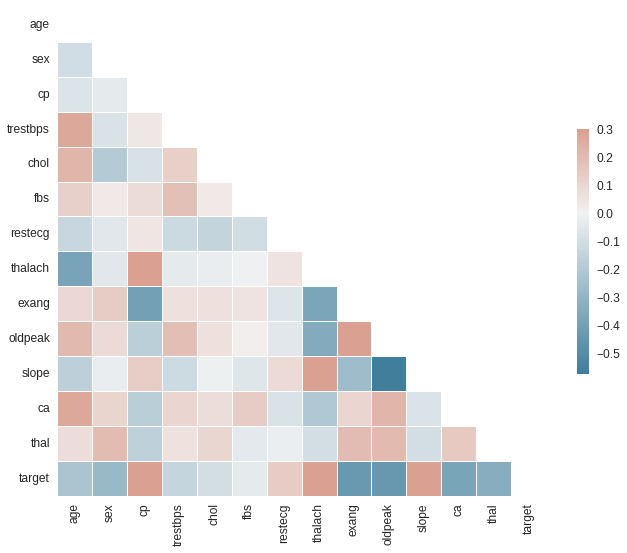

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});